11490434/11490434 [==============================] - 7s 1us/step


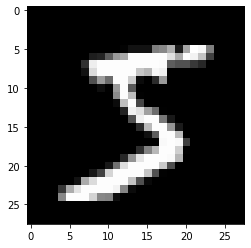

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics
# Load the OCR dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap='gray')  # imshow() function which simply displays an image.
plt.show() 
print(x_train[0])

In [13]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.
x_test = x_test.astype('float32')
x_train /= 255  # Each image has Intensity from 0 to 255
x_test /= 255

In [15]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train]  # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] # f your particular categories is present then it mark as 1 else 0 in remain row

In [16]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))  # The input_shape argument is passed to the foremost layer. It comprises of a tuple shape,
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512  
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # for a multi-class classification problem  
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [18]:
# Train the model
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
                    validation_data=(x_test, y_test)) # Using validation_data means you are providing the training set and validation set yourself, 
                                                      # validation_split means you only provide a training set and keras splits it into a training set and a validation set

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2539 - accuracy: 0.9216 - val_loss: 0.1443 - val_accuracy: 0.9547
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1039 - accuracy: 0.9665 - val_loss: 0.0730 - val_accuracy: 0.9789
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0693 - val_accuracy: 0.9795
Epoch 4/20
469/469 [==============================] - 11s 22ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0669 - val_accuracy: 0.9811
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0747 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0687 - val_accuracy: 

In [19]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07907029986381531
Test accuracy: 0.9843000173568726
